# GA 1.5: Illustration of Central Differences Issue

<h1 style="position: absolute; display: flex; flex-grow: 0; flex-shrink: 0; flex-direction: row-reverse; top: 90px;right: 30px; margin: 0; border: 0">
    <style>
        .markdown {width:100%; position: relative}
        article { position: relative }
    </style>
    <img src="https://gitlab.tudelft.nl/mude/public/-/raw/main/tu-logo/TU_P1_full-color.png" style="width:100px" />
    <img src="https://gitlab.tudelft.nl/mude/public/-/raw/main/mude-logo/MUDE_Logo-small.png" style="width:100px" />
</h1>
<h2 style="height: 25px">
</h2>

*[CEGM1000 MUDE](http://mude.citg.tudelft.nl/): Week 1.5, Friday, Oct 4, 2024.*

Made by Gabriel Follet

In [1]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd


data=pd.read_csv(filepath_or_buffer='justIce.csv',index_col=0)
data.index = pd.to_datetime(data.index, format="%Y-%m-%d")

data_2021 = data.loc['2021']
h_ice = (data_2021.to_numpy()).ravel()
t_days = ((data_2021.index - data_2021.index[0]).days).to_numpy()


## Option 1a
We fit polynomial to data ( the  4th order fit it good represeantion of data in domain (0-100), to use large domain order 3 is better), compute derivative of fitted polynomial and compare with FD,BD and CD of observations

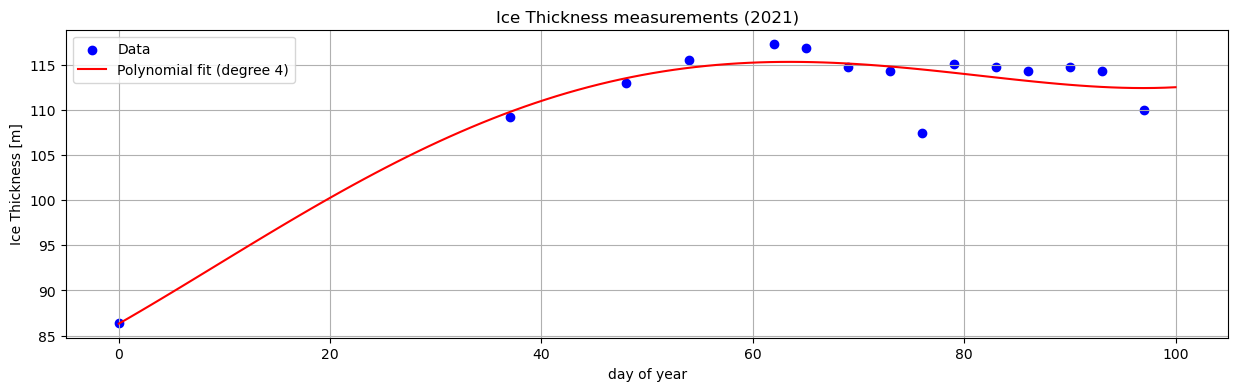

In [2]:
x = t_days
y = h_ice

# fitting polynomila
degree = 4
coefficients = np.polyfit(x, y, degree)
polynomial = np.poly1d(coefficients)
x_fit = np.linspace(0, 100, 100)
y_fit = polynomial(x_fit)
# analytical derivatie (could have done by hand..)
derivative = polynomial.deriv()
y_derivative = derivative(x_fit)


# plottin'
plt.figure(figsize=(15, 4))
plt.scatter(x, y, label='Data', color='blue')
plt.plot(x_fit, y_fit, label=f'Polynomial fit (degree {degree})', color='red')
plt.xlabel('day of year')
plt.ylabel('Ice Thickness [m]')
plt.title('Ice Thickness measurements (2021)')
plt.legend()
plt.grid()
plt.show()

In [3]:


# SOLUTION:
dh_dt_FD = (h_ice[1:]-h_ice[:-1])/(t_days[1:]-t_days[:-1]) 
dh_dt_BD = (h_ice[1:]-h_ice[:-1])/(t_days[1:]-t_days[:-1]) 
dh_dt_CD = (h_ice[1:]-h_ice[:-1])/(t_days[1:]-t_days[:-1]) 

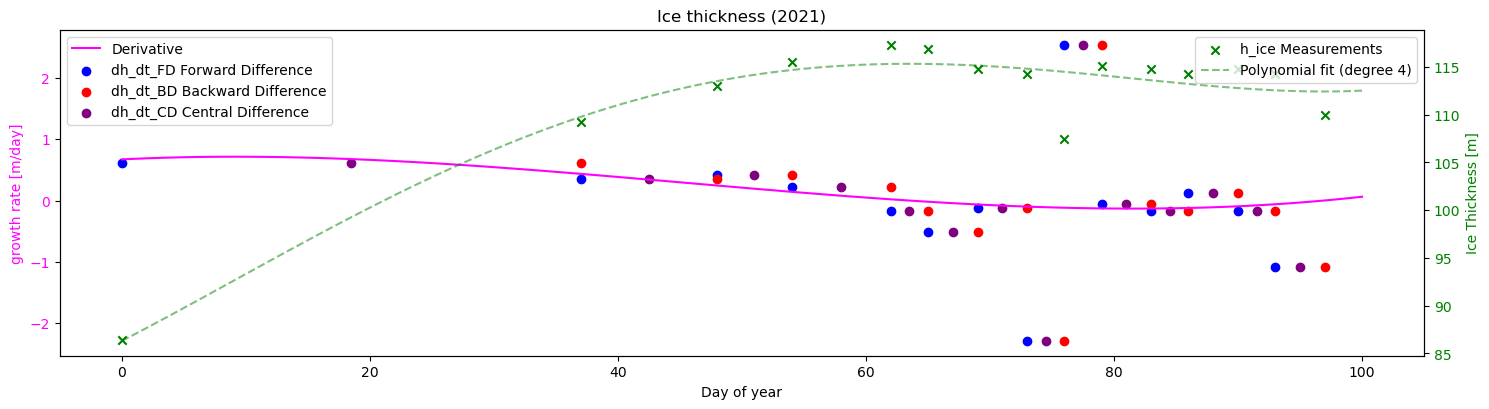

In [9]:

fig, ax1 = plt.subplots(figsize=(15, 4))
#left axis
ax1.plot(x_fit, y_derivative, label='Derivative', color='magenta')
ax1.set_ylabel('growth rate [m/day]', color='magenta')
ax1.tick_params(axis='y', labelcolor='magenta')
ax1.scatter(t_days[:-1], dh_dt_FD,
            color='blue', marker='o', label='dh_dt_FD Forward Difference')
ax1.scatter(t_days[1:], dh_dt_BD,
            color='red', marker='o', label='dh_dt_BD Backward Difference')
ax1.scatter((t_days[1:]+t_days[:-1])/2, dh_dt_CD,
            color='purple', marker='o', label='dh_dt_CD Central Difference')

#right axis
ax2 = ax1.twinx()
ax2.scatter(x, y, color='green', marker='x', label='h_ice Measurements')
ax2.plot(x_fit, y_fit, label=f'Polynomial fit (degree {degree})', color='green',linestyle='--',alpha=0.5)
ax2.set_ylabel('Ice Thickness [m]', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Add title and legends
plt.title('Ice thickness (2021)')
fig.tight_layout()  # Adjust layout to prevent overlap
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax1.set_xlabel('Day of year')
plt.show()



pretty good, but the fit is not perfect, particularly around days 70-90, also using the derivative of the fit could confuse students

## Option 1b
Similar to last version, but instead of using the actual measurement to estimate the gradient, we 'sample' some points from the fitted polynomial and 'assume' that this are measurements

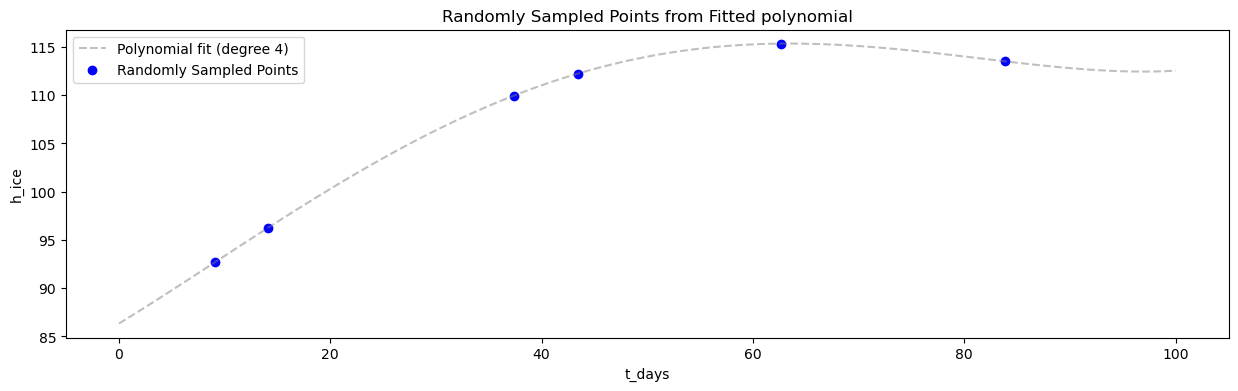

In [10]:
num_samples = 6 # 


np.random.seed(13)  #setting seed
indices = np.random.choice(len(x_fit), size=num_samples, replace=False)
sampled_t_days = x_fit[indices]
sampled_h_ice = y_fit[indices]

sorted_indices = np.argsort(sampled_t_days)
sampled_t_days = sampled_t_days[sorted_indices]
sampled_h_ice = sampled_h_ice[sorted_indices]

plt.figure(figsize=(15,4))
plt.plot(x_fit, y_fit, label=f'Polynomial fit (degree {degree})', color='grey',linestyle='--',alpha=0.5)
plt.scatter(sampled_t_days, sampled_h_ice, label='Randomly Sampled Points', color='blue')
plt.xlabel('t_days')
plt.ylabel('h_ice')
plt.title('Randomly Sampled Points from Fitted polynomial')
plt.legend()
plt.show()


we now repeat teh steps  from  option 1a

In [6]:
# SOLUTION:
dh_dt_FD_sampled_from_fit = (sampled_h_ice[1:]-sampled_h_ice[:-1])/(sampled_t_days[1:]-sampled_t_days[:-1]) 
dh_dt_BD_sampled_from_fit = (sampled_h_ice[1:]-sampled_h_ice[:-1])/(sampled_t_days[1:]-sampled_t_days[:-1]) 
dh_dt_CD_sampled_from_fit = (sampled_h_ice[1:]-sampled_h_ice[:-1])/(sampled_t_days[1:]-sampled_t_days[:-1]) 

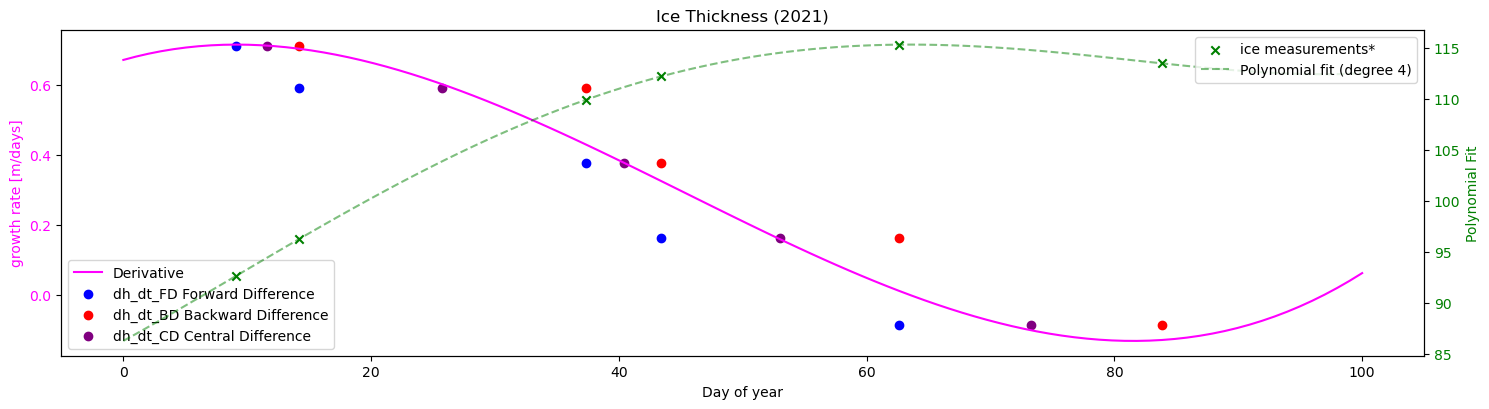

In [11]:

fig, ax1 = plt.subplots(figsize=(15, 4))
#left axis
ax1.plot(x_fit, y_derivative, label='Derivative', color='magenta')
ax1.set_ylabel('growth rate [m/days]', color='magenta')
ax1.tick_params(axis='y', labelcolor='magenta')
ax1.scatter(sampled_t_days[:-1], dh_dt_FD_sampled_from_fit,
            color='blue', marker='o', label='dh_dt_FD Forward Difference')
ax1.scatter(sampled_t_days[1:], dh_dt_BD_sampled_from_fit,
            color='red', marker='o', label='dh_dt_BD Backward Difference')
ax1.scatter((sampled_t_days[1:]+sampled_t_days[:-1])/2, dh_dt_CD_sampled_from_fit,
            color='purple', marker='o', label='dh_dt_CD Central Difference')

#right axis
ax2 = ax1.twinx()
ax2.scatter(sampled_t_days, sampled_h_ice, color='green', marker='x', label='ice measurements*')
ax2.plot(x_fit, y_fit, label=f'Polynomial fit (degree {degree})', color='green',linestyle='--',alpha=0.5)
ax2.set_ylabel('Polynomial Fit', color='green')
ax2.tick_params(axis='y', labelcolor='green')


plt.title('Ice Thickness (2021)')
fig.tight_layout()  
ax1.legend(loc='lower left')
ax2.legend(loc='upper right')
ax1.set_xlabel('Day of year')

plt.show()

plt.show()
fig.savefig('central_diff_illustration.svg')

much better, we can see that CD is better!! also if we increase the number of samples we can see how the step size (not really cuz it still random samples, but you get the point) affects the different estimation.

## Option 2 
Interpretation fo Robert's idea: Reconstruct ice thickness measurement from the  different gradient estimation (basically taylor of order 1)

In [8]:
# first point
estimated_h_ice_FD = [h_ice[0]]  
estimated_h_ice_BD = [h_ice[0]]  
estimated_h_ice_CD = [h_ice[1]]  

# FD   - new point is previous point plus the stepsize time the derivative at that point
for i in range(1, len(t_days) - 1):
    delta_t = t_days[i] - t_days[i-1]
    next_point_FD = estimated_h_ice_FD[-1] + dh_dt_FD[i-1] * delta_t
    estimated_h_ice_FD.append(next_point_FD)



aren't we just going in circles?? If we use finite differences to compute $x_{i+1}$  with Taylor of first order$$x_{i+1}=x_i+\Delta*f'$$ but we are estimating $f'_i$ from 
$(x_i,x_{i+1})$
 so they would basically cancel each other and we would get $x_{i+1}$ ??

**End of notebook.**

<div style="margin-top: 50px; padding-top: 20px; border-top: 1px solid #ccc;">
  <div style="display: flex; justify-content: flex-end; gap: 20px; align-items: center;">
    <a rel="MUDE" href="http://mude.citg.tudelft.nl/">
      <img alt="MUDE" style="width:100px; height:auto;" src="https://gitlab.tudelft.nl/mude/public/-/raw/main/mude-logo/MUDE_Logo-small.png" />
    </a>
    <a rel="TU Delft" href="https://www.tudelft.nl/en/ceg">
      <img alt="TU Delft" style="width:100px; height:auto;" src="https://gitlab.tudelft.nl/mude/public/-/raw/main/tu-logo/TU_P1_full-color.png" />
    </a>
    <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">
      <img alt="Creative Commons License" style="width:88px; height:auto;" src="https://i.creativecommons.org/l/by/4.0/88x31.png" />
    </a>
  </div>
  <div style="font-size: 75%; margin-top: 10px; text-align: right;">
    By <a rel="MUDE" href="http://mude.citg.tudelft.nl/">MUDE Team</a>
    &copy; 2024 TU Delft. 
    <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">CC BY 4.0</a>.
    <a rel="Zenodo DOI" href="https://doi.org/10.5281/zenodo.16782515"><img style="width:auto; height:15; vertical-align:middle" src="https://zenodo.org/badge/DOI/10.5281/zenodo.16782515.svg" alt="DOI https://doi.org/10.5281/zenodo.16782515"></a>
  </div>
</div>


<!--tested with WS_2_8_solution.ipynb-->